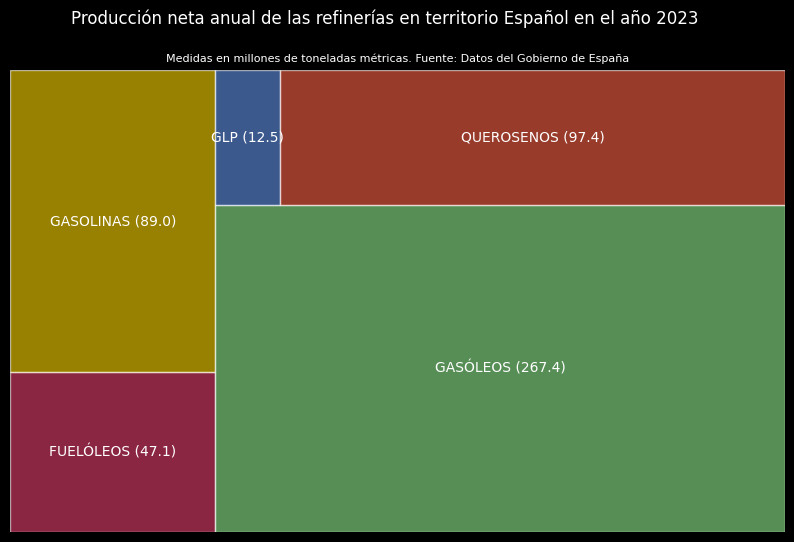

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import squarify

# Leer los datos del archivo CSV
df = pd.read_csv("d89af88a-d055-481b-aa31-05e9e35061ef.csv", encoding="latin1")

# Convertir la columna 'fecha' a tipo datetime
df['fecha'] = pd.to_datetime(df['fecha'])

# Filtrar los datos para obtener solo los datos del año 2023
df_2023 = df[df['fecha'].dt.year == 2023]

# Sumarizar la producción por tipo de producto para el año 2023 y dividir entre 100,000
df_2023_sum = df_2023.groupby('tipo_producto')['produccion'].sum().reset_index()
df_2023_sum['produccion'] /= 100000  # Dividir entre 100,000

# Crear treemap para el año 2023
plt.figure(figsize=(10, 6))

# Establecer fondo negro
plt.style.use('dark_background')

# Colores estilo Reuters
colors = ['#E83F6F', '#FFD700', '#90EE90', '#6495ED', '#FF6347']

squarify.plot(sizes=df_2023_sum['produccion'], label=df_2023_sum.apply(lambda x: f"{x['tipo_producto']} ({x['produccion']:.1f})", axis=1), alpha=0.6, color=colors, linewidth=1, edgecolor='white')
plt.title('Medidas en millones de toneladas métricas. Fuente: Datos del Gobierno de España',fontsize= 8)
plt.suptitle("Producción neta anual de las refinerías en territorio Español en el año 2023")
plt.axis('off')  # Eliminar ejes

plt.show()
